# FINAL PROJECT 3 KAMPUS MERDEKA - KELOMPOK 4
NAMA KELOMPOK :
- ALFENDO RIZKY SYACHPUTRA
- SAVITRI DYAH AYU PITALOKA
- SYAIMA RADESTYA

## 1. Perkenalan (Overview)
***
#### **Latar Belakang**
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

#### **Dataset**
Dataset yang digunakan pada project ini yaitu heart failure clinical records yang tersedia dari website kaggle melalui [link berikut](https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data)

Dataset ini  berisi faktor-faktor kematian oleh gagal jantung yang memiliki 13 atribut dengan 299 rows. Atribut yang menjadi target yaitu atribut Death Event/Kematian, sedangkan atribut lainnya merupakan prediktor.

#### **Objective yang ingin dicapai**
Objective yang ingin dicapai dalam analisis ini yaitu:

- Memahami konsep Classification dengan Ensemble Model
- Mampu mempersiapkan data untuk digunakan dalam Ensemble Model
- Dapat mengimplementasikan Ensemble Model untuk membuat prediksi

## 2. Import Library yang Dibutuhkan
***

In [312]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import ExtraTreesClassifier

import pickle

## 3. Data Loading
***
Bagian ini berisi proses data loading yang kemudian dilanjutkan dengan
explorasi data secara sederhana.

In [313]:
# loading data dengan menggunakan pandas
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [314]:
# set untuk menampilkan semua kolom pada data
pd.set_option("display.max_columns", None)

In [315]:
# menampilkan 5 baris teratas
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [316]:
# melihat 5 baris terbawah
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [317]:
# melihat dimensi dataset
df.shape

(299, 13)

In [318]:
# menampilkan informasi pada dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [319]:
# menampilkan rincian nama pada kolom
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [320]:
# mengecek apakah dataset terdapat missing value
df.isnull().values.any()

False

In [321]:
# Variabel bertipe kategorik
categorical = [i for i in df.columns if df[i].dtypes == 'O']

# Variabel bertipe numerik
numerical = [i for i in df.columns if i not in categorical]
print('categorical:', categorical, '\n', 'numerical: ', numerical)

categorical: [] 
 numerical:  ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT']


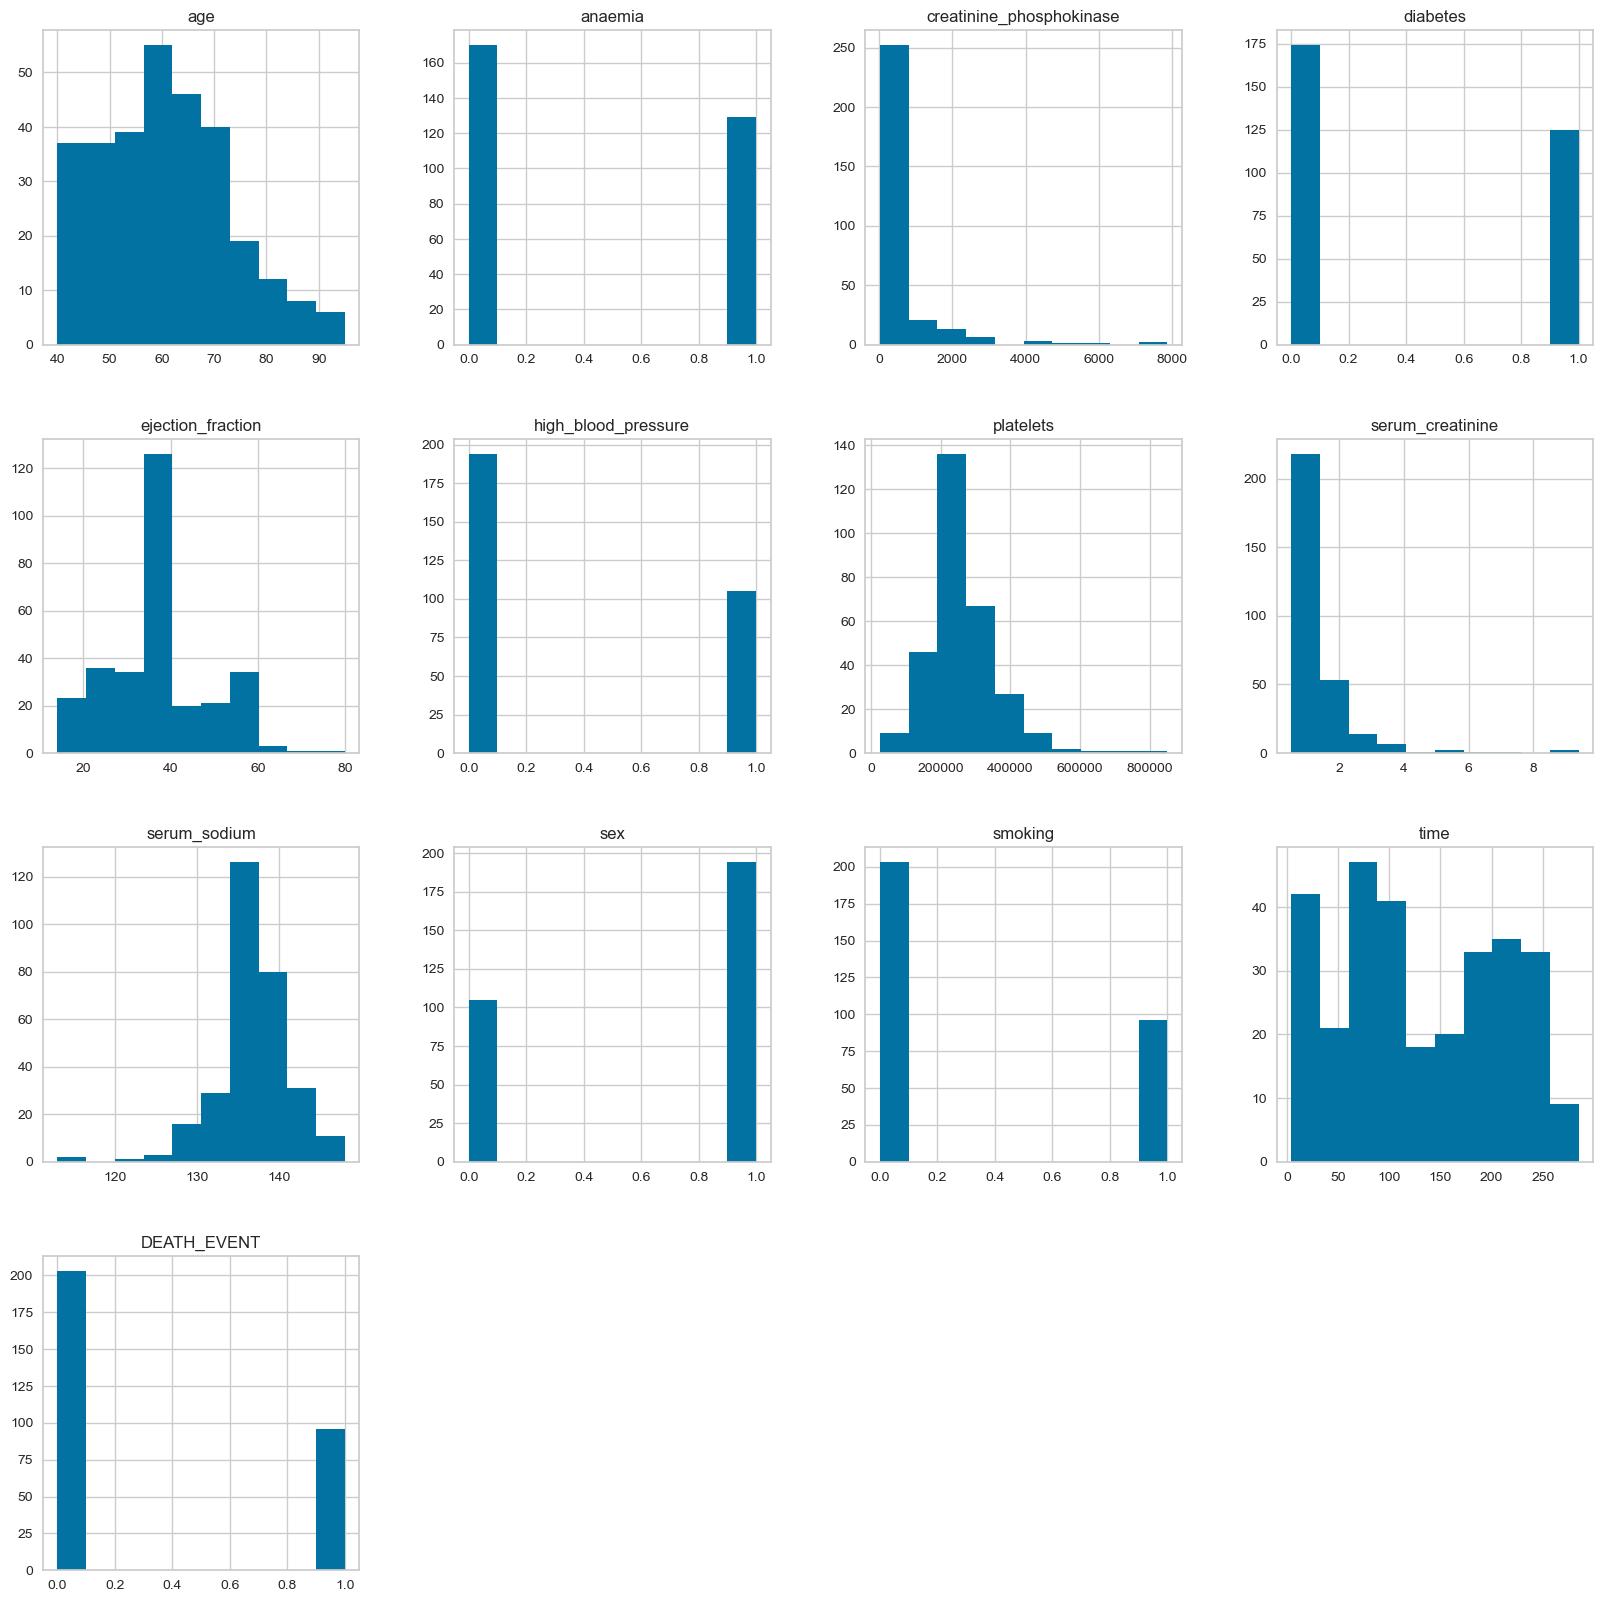

In [322]:
# Melihat distribusi pada atribut numerik
df[numerical].hist(bins=10, figsize = (20,20))
plt.show()

- Berdasarkan histogram terlihat bahwa tidak terdapat atribut yang berdistribusi normal dan atribut yang memiliki skewness tinggi, yaitu atribut creatinine_phosphokinase.

In [323]:
# melihat statistik deskriptif dari masing-masing atribut
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [324]:
# menampilkan banyaknya unique values pada masing-masing atribut
for col in df.columns:
    print(col,':', df[col].nunique())

age : 47
anaemia : 2
creatinine_phosphokinase : 208
diabetes : 2
ejection_fraction : 17
high_blood_pressure : 2
platelets : 176
serum_creatinine : 40
serum_sodium : 27
sex : 2
smoking : 2
time : 148
DEATH_EVENT : 2


In [325]:
df['ejection_fraction'].unique()

array([20, 38, 40, 15, 60, 65, 35, 25, 30, 50, 14, 55, 45, 62, 80, 17, 70],
      dtype=int64)

In [326]:
df['age'].unique()

array([75.   , 55.   , 65.   , 50.   , 90.   , 60.   , 80.   , 62.   ,
       45.   , 49.   , 82.   , 87.   , 70.   , 48.   , 68.   , 53.   ,
       95.   , 58.   , 94.   , 85.   , 69.   , 72.   , 51.   , 57.   ,
       42.   , 41.   , 67.   , 79.   , 59.   , 44.   , 63.   , 86.   ,
       66.   , 43.   , 46.   , 61.   , 81.   , 52.   , 64.   , 40.   ,
       60.667, 73.   , 77.   , 78.   , 54.   , 47.   , 56.   ])

## 4. Data Cleaning
***
Bagian ini berisi proses penyiapan data berupa data cleaning sebelum
dilakukan explorasi data lebih lanjut. Proses cleaning dapat berupa
memberi nama baru untuk setiap kolom, mengisi missing values,
menghapus kolom yang tidak dipakai, dan lain sebagainya.

#### Cek duplikasi pada dataset

In [327]:
df.duplicated().sum()

0

#### Menampilkan jumlah missing values pada tiap kolom

In [328]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

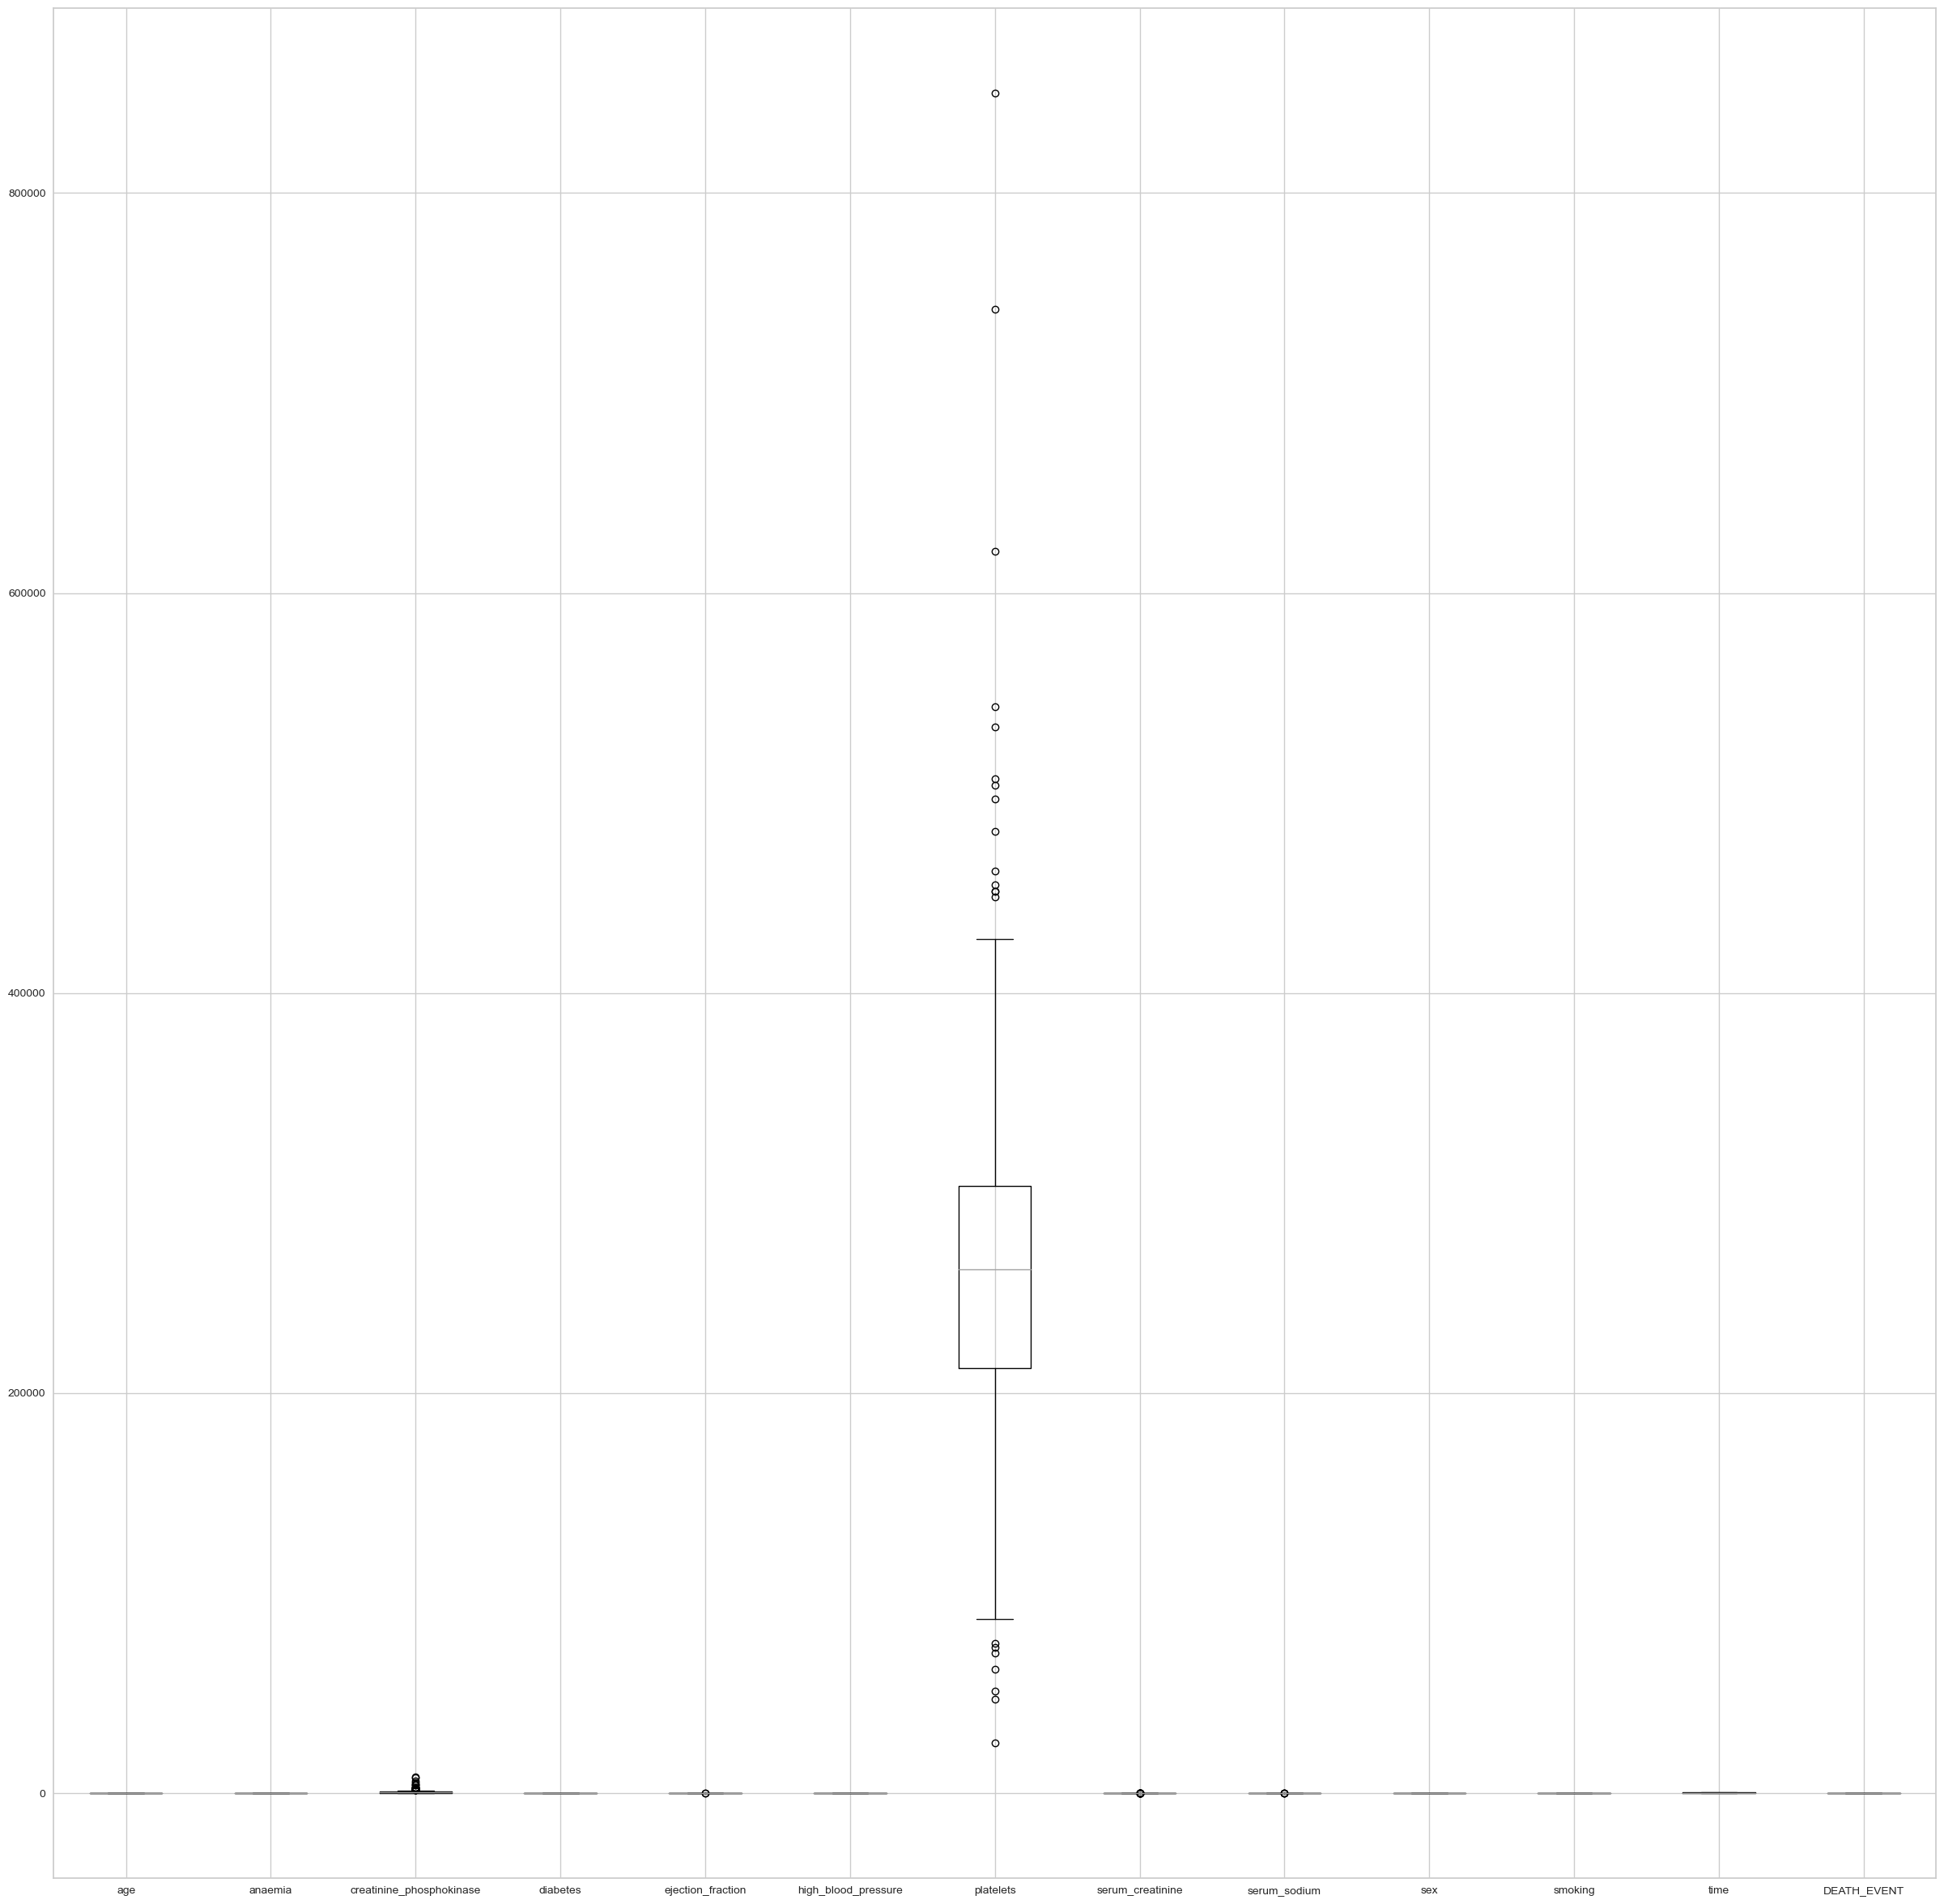

In [329]:
df[numerical].boxplot(figsize=(30,30))
plt.show()

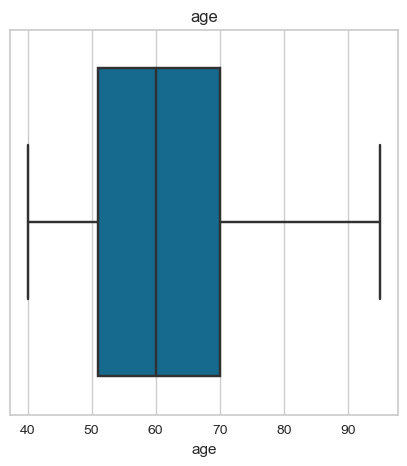

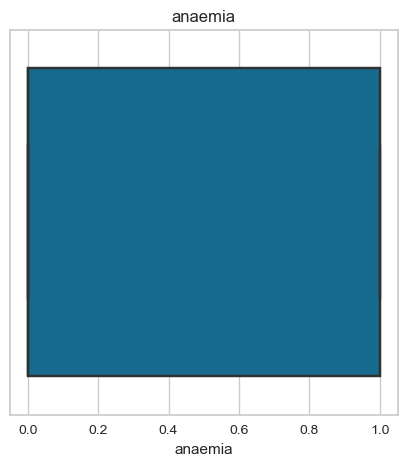

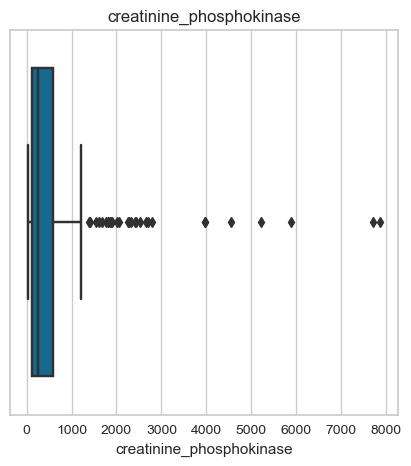

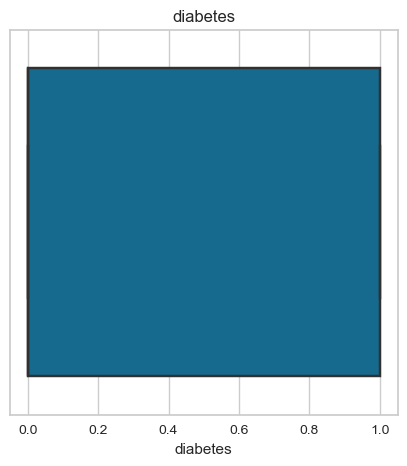

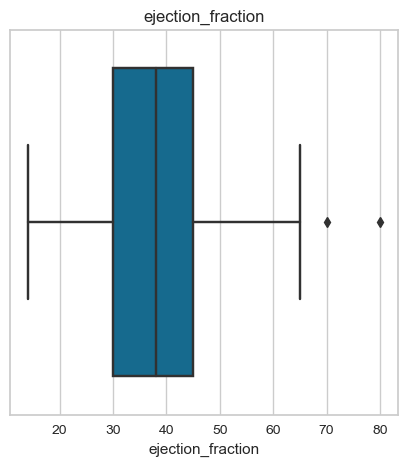

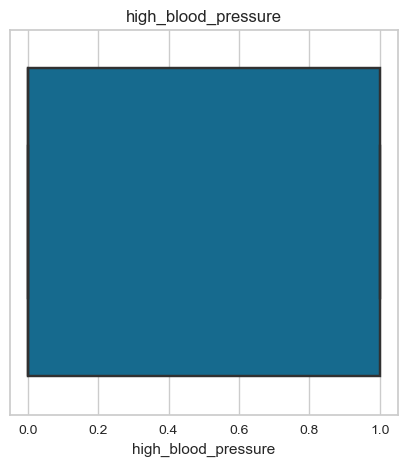

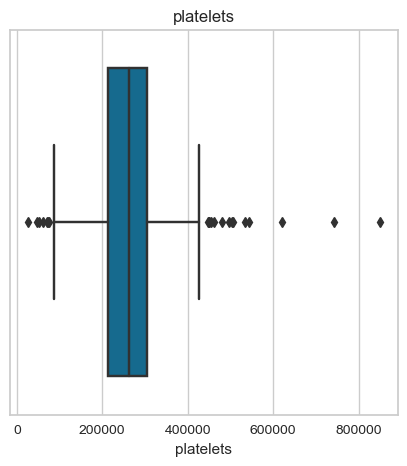

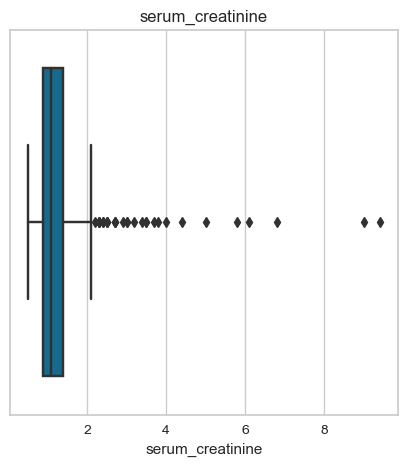

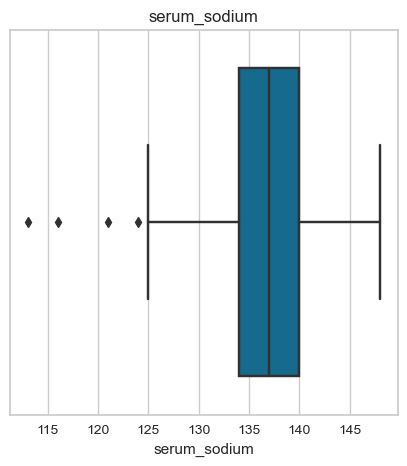

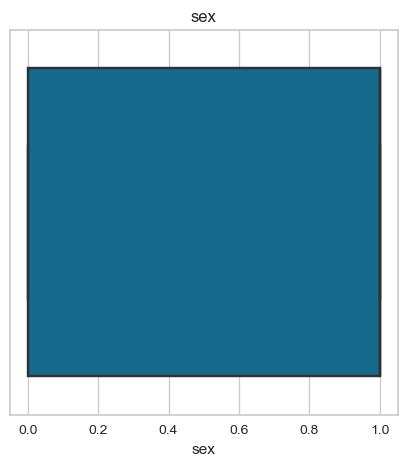

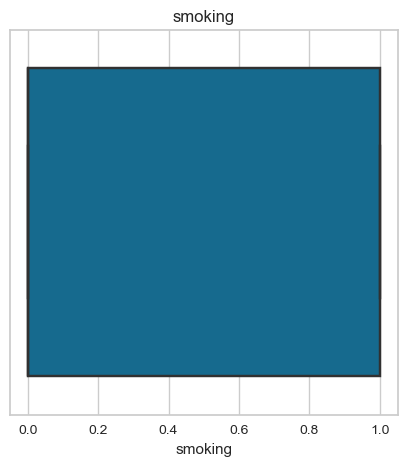

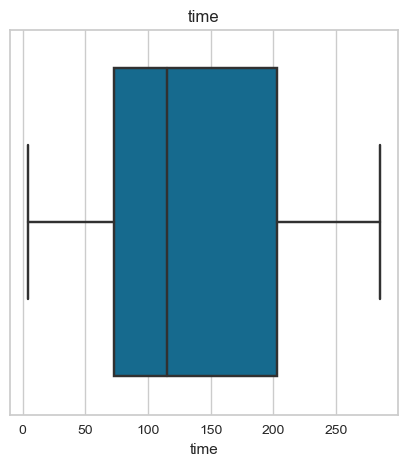

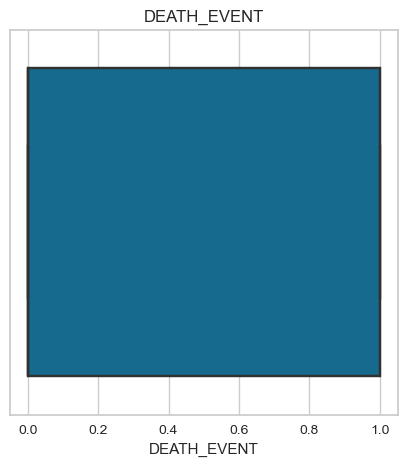

In [330]:
for feature in df:
    plt.figure(figsize=(5,5))
    sns.boxplot(df[feature])
    plt.title(feature)

- Boxplot menunjukkan bahwa masih terdapat atribut dengan nilai outlier yang banyak.

Outlier Treatment untuk menghilangkan outlier dari fitur numerik

In [331]:
features_with_outliers = ['creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium']
for feature in features_with_outliers:
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    df.loc[df[feature]<lower_limit,feature] = lower_limit
    df.loc[df[feature]>upper_limit,feature] = upper_limit

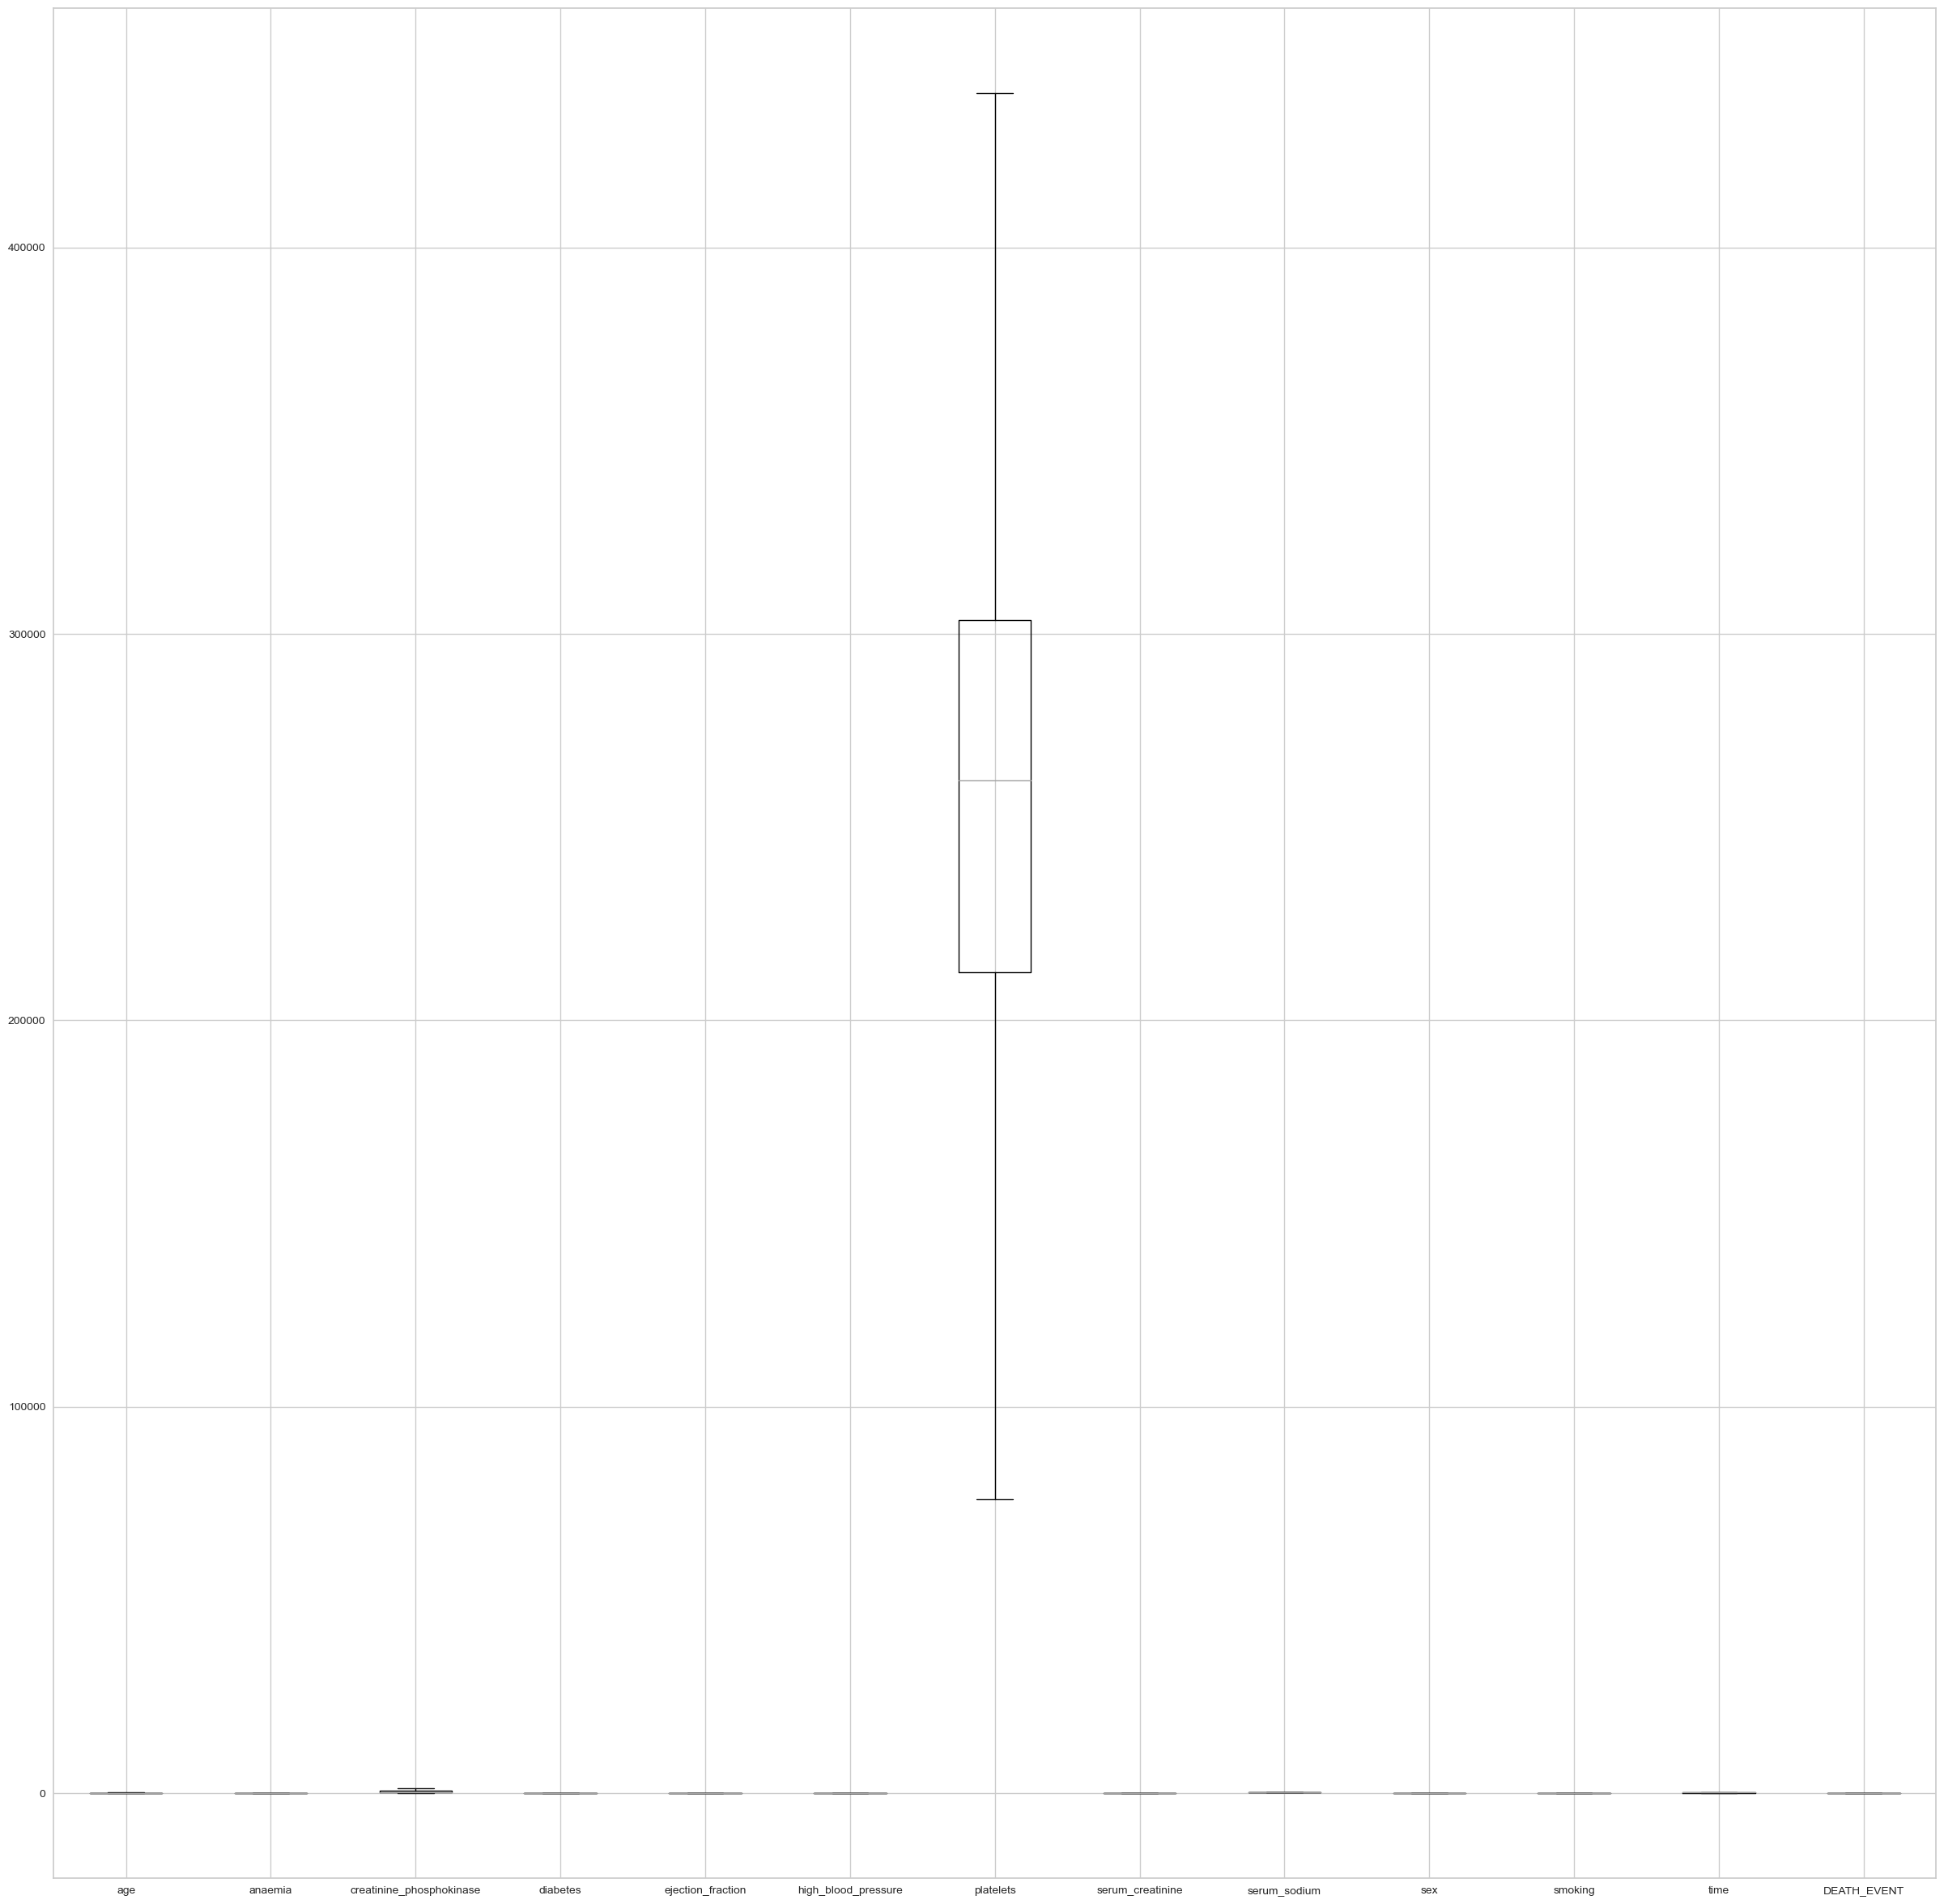

In [332]:
df[numerical].boxplot(figsize=(30,30))
plt.show()

Fitur numerik bebas dari outlier.

#### Memberikan nama baru (rename) pada setiap kolom atau atribut

In [333]:
df = df.rename(columns={'age':'Usia', 
                        'anaemia':'Anemia', 
                        'creatinine_phosphokinase':'TesCPK', 
                        'diabetes':'Diabetes', 
                        'ejection_fraction':'EF', 
                        'high_blood_pressure':'Hipertensi', 
                        'platelets':'Trombosit', 
                        'serum_creatinine':'Serum_Kreatinin', 
                        'serum_sodium':'Serum_Sodium', 
                        'sex':'Gender', 
                        'smoking':'Merokok', 
                        'time':'Waktu', 
                        'DEATH_EVENT':'Kematian'})

df.head()

,Usia,Anemia,TesCPK,Diabetes,EF,Hipertensi,Trombosit,Serum_Kreatinin,Serum_Sodium,Gender,Merokok,Waktu,Kematian
0,75.0,0,582.00,0,20.0,1,265000.00,1.90,130,1,0,4,1
1,55.0,0,1280.25,0,38.0,0,263358.03,1.10,136,1,0,6,1
2,65.0,0,146.00,0,20.0,0,162000.00,1.30,129,1,1,7,1
3,50.0,1,111.00,0,20.0,0,210000.00,1.90,137,1,0,7,1
4,65.0,1,160.00,1,20.0,0,327000.00,2.15,125,0,0,8,1


In [334]:
df.columns

Index(['Usia', 'Anemia', 'TesCPK', 'Diabetes', 'EF', 'Hipertensi', 'Trombosit',
       'Serum_Kreatinin', 'Serum_Sodium', 'Gender', 'Merokok', 'Waktu',
       'Kematian'],
      dtype='object')

In [335]:
# Melihat banyaknya nilai dari setiap atribut
for col in df.columns:
    print(col, ': ')
    print(df[col].value_counts())
    print('='*70)

Usia : 
60.000    33
50.000    27
65.000    26
70.000    25
45.000    19
55.000    17
75.000    11
53.000    10
58.000    10
63.000     8
80.000     7
72.000     7
40.000     7
42.000     7
85.000     6
68.000     5
52.000     5
62.000     5
51.000     4
59.000     4
61.000     4
73.000     4
49.000     4
69.000     3
46.000     3
64.000     3
82.000     3
90.000     3
78.000     2
60.667     2
54.000     2
77.000     2
57.000     2
66.000     2
44.000     2
67.000     2
95.000     2
48.000     2
43.000     1
86.000     1
81.000     1
79.000     1
41.000     1
94.000     1
87.000     1
47.000     1
56.000     1
Name: Usia, dtype: int64
Anemia : 
0    170
1    129
Name: Anemia, dtype: int64
TesCPK : 
582.00     47
1280.25    29
66.00       4
129.00      4
231.00      3
           ..
156.00      1
305.00      1
898.00      1
53.00       1
103.00      1
Name: TesCPK, Length: 180, dtype: int64
Diabetes : 
0    174
1    125
Name: Diabetes, dtype: int64
EF : 
35.0    49
38.0    40
40.0    37

## 5. Explorasi Data
***
Bagian ini berisi explorasi data pada dataset diatas dengan menggunakan
query, grouping, visualisasi sederhana, dan lain sebagainya.

#### a. Melihat kadar trombosit pasien penyakit jantung terbanyak dan terkecil

In [336]:
df['Trombosit'].agg(('min', 'max'))

min     76000.0
max    440000.0
Name: Trombosit, dtype: float64

**Kesimpulan :** Dari hasil diatas maka dapat diketahui bahwa trombosit terkecil pasien yaitu 25100.0, dan trombosit terbanyak pasien yaitu 850000.0. Kadar trombosit yang normal pada setiap manusia berkisar 150.000-450.000 per mikroliter darah

#### b. Melihat kadar serum keratin pada pasien penyakit jantung terendah dan tertinggi

In [337]:
df['Serum_Kreatinin'].agg(('min', 'max'))

min    0.50
max    2.15
Name: Serum_Kreatinin, dtype: float64

**Kesimpulan :** Dari hasil tersebut maka dapat kita ketahui bahwa kadar serum keratin terkecil pasien yaitu 0.5 mg/dL dan kadar serum keratin tertinggi yaitu 9.4 mg/dL. Kreatin adalah zat yang dihasilkan dari konstraksi otot normal dan dilepaskan ke dalam darah, kemudian melewati ginjal untuk diekskresikan. Nilai normal kreatinin serum pada pria dan wanita adalah 0,6 - 1,3 mg/dL.

#### c. Melihat proporsi data pada kolom Usia dan Kematian dengan menggunakan crosstab

In [338]:
pd.crosstab(df.Kematian, df.Usia)

Usia,40.000,41.000,42.000,43.000,44.000,45.000,46.000,47.000,48.000,49.000,50.000,51.000,52.000,53.000,54.000,55.000,56.000,57.000,58.000,59.000,60.000,60.667,61.000,62.000,63.000,64.000,65.000,66.000,67.000,68.000,69.000,70.000,72.000,73.000,75.000,77.000,78.000,79.000,80.000,81.000,82.000,85.000,86.000,87.000,90.000,94.000,95.000
Kematian,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,7,1,6,1,2,13,2,1,0,3,19,3,5,9,1,14,1,1,8,1,20,1,4,4,8,3,18,2,2,3,1,18,2,3,5,1,2,1,2,1,0,3,0,0,1,0,0
1,0,0,1,0,0,6,1,0,2,1,8,1,0,1,1,3,0,1,2,3,13,1,0,1,0,0,8,0,0,2,2,7,5,1,6,1,0,0,5,0,3,3,1,1,2,1,2


#### d. Melakukan grouping pada atribut Usia dan Kematian untuk melihat rata-ratanya

In [339]:
df[['Usia','Kematian']].groupby('Kematian').mean().sort_values(by='Usia', ascending=True)

,Usia
Kematian,
0,58.761906
1,65.215281


**Kesimpulan :** Dari hasil diatas maka dapat diketahui bahwa rata-rata usia pasien yang meninggal yakni 65 tahun, sedangkan rata-rata pasien yang bertahan (tidak meninggal) yaitu berusia 58 tahun

#### e. Melihat data histori record dengan melakukan query, yaitu :

- Pasien berusia lebih dari 50 tahun
- Pasien memiliki kadar serum keratinin sama dengan 1 mg/dL
- Pasien memiliki kadar serum sodium sama dengan 140 mEq/L

In [340]:
df[
    (df['Usia'] > 50.0) &
    (df['Serum_Kreatinin'] == 1) &
    (df['Serum_Sodium'] == 140) 
].head()

,Usia,Anemia,TesCPK,Diabetes,EF,Hipertensi,Trombosit,Serum_Kreatinin,Serum_Sodium,Gender,Merokok,Waktu,Kematian
18,70.0,1,125.00,0,25.0,1,237000.0,1.0,140,0,0,15,1
34,65.0,0,94.00,1,50.0,1,188000.0,1.0,140,1,0,29,1
49,57.0,1,129.00,0,30.0,0,395000.0,1.0,140,0,0,42,1
67,72.0,1,110.00,0,25.0,0,274000.0,1.0,140,1,1,65,1
227,55.0,1,1280.25,0,35.0,1,141000.0,1.0,140,1,0,206,0


#### f. Melihat proporsi data status kematian berdasarkan gender dan hipertensi

In [341]:
df['JenisKelamin'] = df['Gender'].replace({1:'Male', 0:'Female'})
df['Death_Status'] = df['Kematian'].replace({1:'Death', 0:'Alive'})
df.head()

,Usia,Anemia,TesCPK,Diabetes,EF,Hipertensi,Trombosit,Serum_Kreatinin,Serum_Sodium,Gender,Merokok,Waktu,Kematian,JenisKelamin,Death_Status
0,75.0,0,582.00,0,20.0,1,265000.00,1.90,130,1,0,4,1,Male,Death
1,55.0,0,1280.25,0,38.0,0,263358.03,1.10,136,1,0,6,1,Male,Death
2,65.0,0,146.00,0,20.0,0,162000.00,1.30,129,1,1,7,1,Male,Death
3,50.0,1,111.00,0,20.0,0,210000.00,1.90,137,1,0,7,1,Male,Death
4,65.0,1,160.00,1,20.0,0,327000.00,2.15,125,0,0,8,1,Female,Death


In [342]:
df.groupby(['JenisKelamin','Hipertensi','Death_Status']).size().unstack().apply(lambda x: x/x.sum(), axis=1)

Death_Status                Alive     Death
JenisKelamin Hipertensi                    
Female       0           0.721311  0.278689
             1           0.613636  0.386364
Male         0           0.699248  0.300752
             1           0.639344  0.360656

**Kesimpulan :** Dari hasil diatas maka dapat diketahui bahwa terdapat beberapa perbedaan proporsi tetapi perbedaan tersebut lebih kepada kondisi hipertensi pada pasien daripada jenis kelamin. untuk jenis kelamin tidak terlalu memiliki pengaruh yang signifikan terhadap status kematian. Tingkat kematian untuk pasien dengan gender perempuan yang tidak memiliki tekanan darah tinggi sekitar 27.86% dan yang memiliki tekanan darah tinggi sekitar 38.63% sedangkan pada pasien laki-laki tingkat status kematian untuk pasien yang tidak mempunyai tekanan darah tinggi sekitar 30% dan yang mempunyai tekanan darah tinggi sekitar 36%. hal ini menunjukkan bahwa **nilai hipertensi memiliki pengaruh yang signifikan terhadap status kematian.**

### Visualisasi Pie Chart dan Histogram untuk Persentase Status Kematian

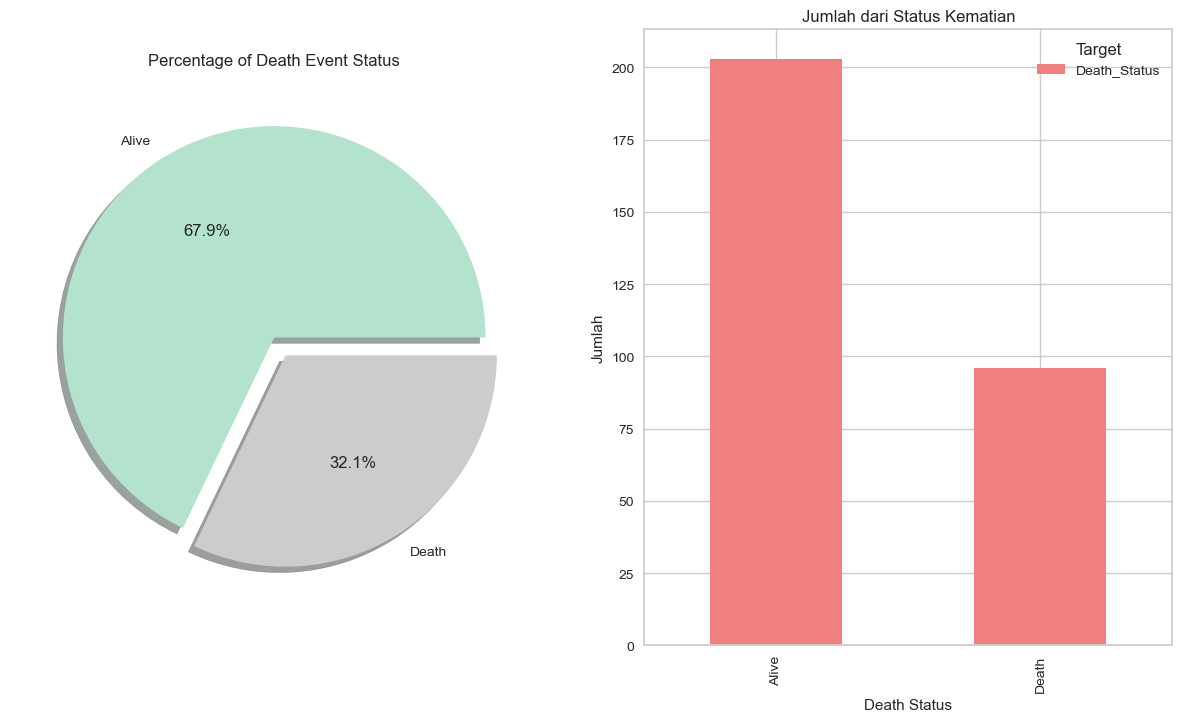

In [343]:
fig, ax = plt.subplots(1,2,figsize=(15,8))

# Pie Chart Percentage of Death event status
df['Death_Status'].value_counts().plot(
    kind='pie', 
    ax=ax[0], 
    autopct='%.1f%%',
    explode=[0,0.1],
    cmap='Pastel2',
    shadow=True
)
ax[0].set_title('Percentage of Death Event Status')
ax[0].set_ylabel('')

# Barchart besaran setiap nilai pada kelas target
df.groupby('Death_Status').agg({'Death_Status':'count'}).plot(
    kind='bar',
    ax=ax[1],
    color='lightcoral'
)
ax[1].set_title('Jumlah dari Status Kematian')
ax[1].set_ylabel('Jumlah')
ax[1].set_xlabel('Death Status')
ax[1].legend(title='Target')

**Kesimpulan :** Dari hasil visualisasi pie chart dan histogram diatas maka dapat dilihat bahwa Persentase Status Kematian "Alive" atau hidup adalah sebesar 67.9% sedangkan "Death" atau meninggal adalah sebesar 32.1%. Maka dapat disimpulkan bahwa data pada column Death_Status data tidak seimbang.

### Melihat Banyaknya Persebaran Jumlah Kematian Pasien Berdasarkan Usia

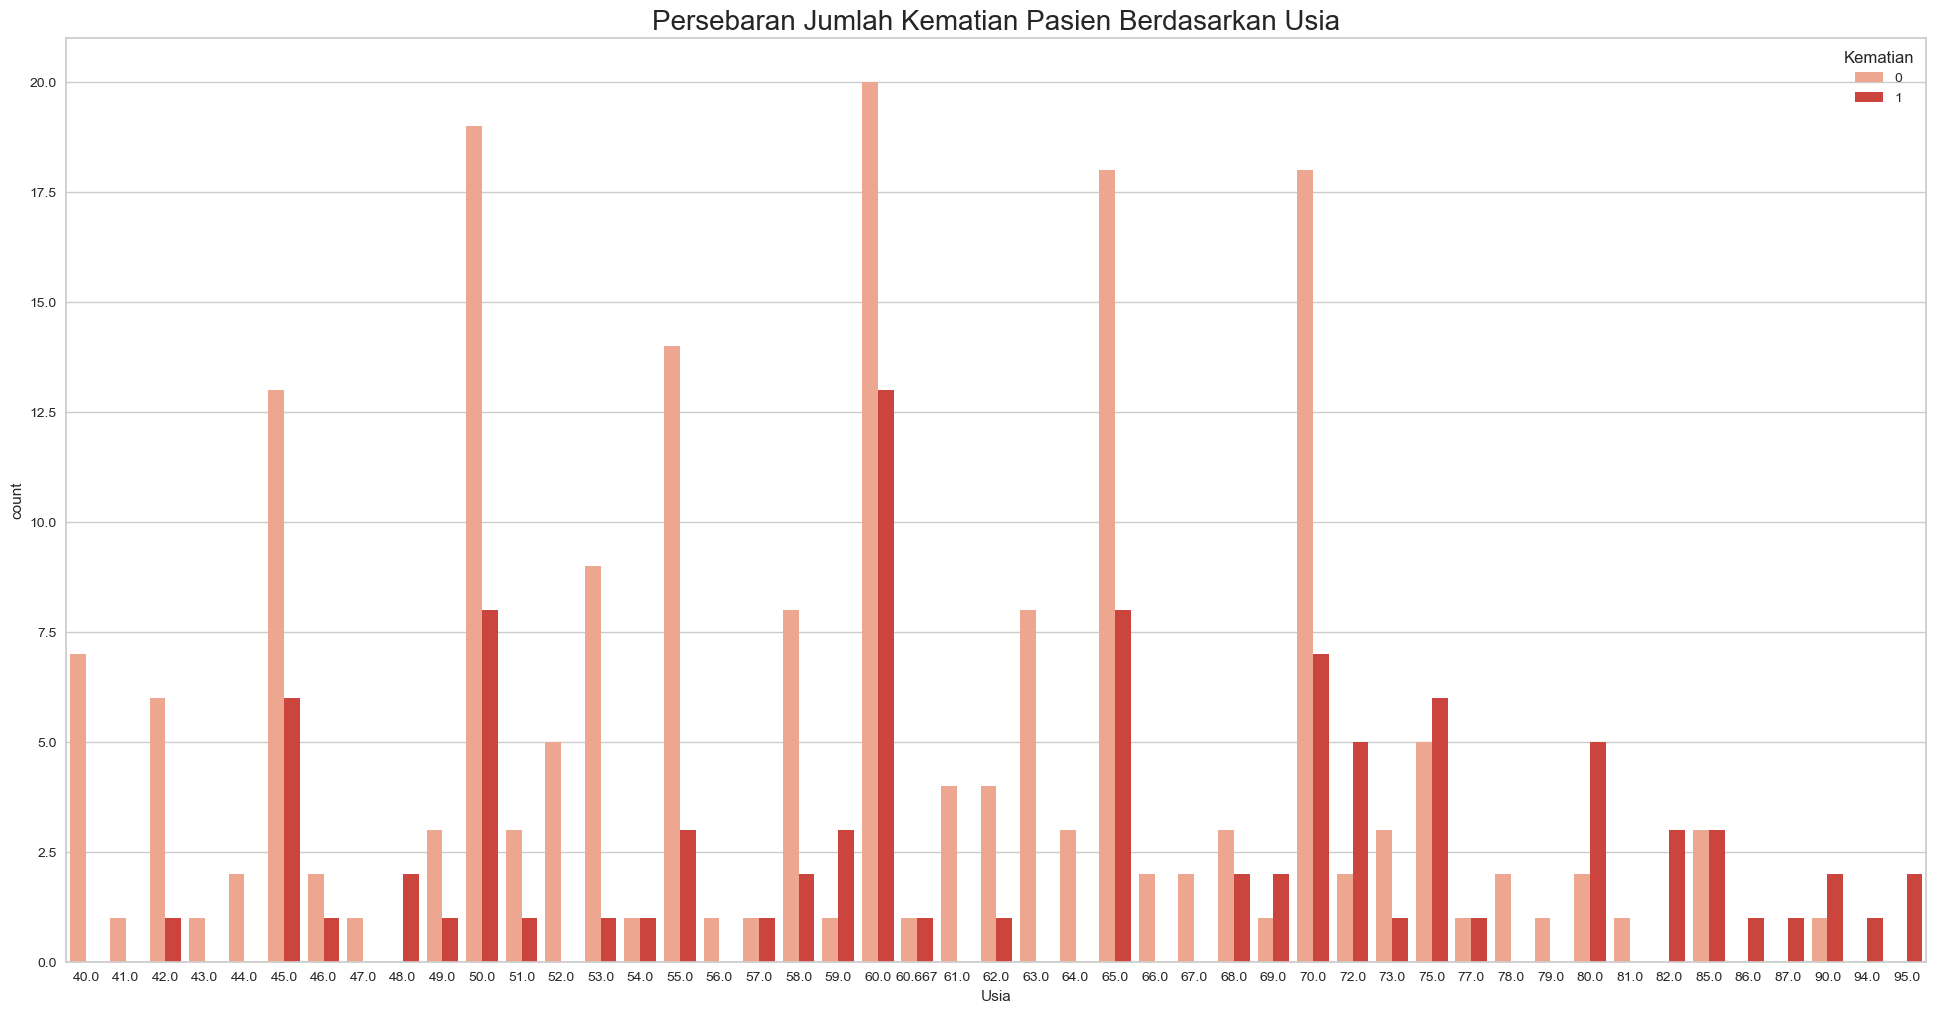

In [344]:
plt.figure(figsize=(24,12))
ax = sns.countplot(x="Usia", hue="Kematian", data=df, palette='Reds')
plt.title('Persebaran Jumlah Kematian Pasien Berdasarkan Usia', fontsize=20)

# Save Plot
plt.savefig("kematian.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

**Kesimpulan :** Dari hasil visualisasi bar chart diatas maka dapat dilihat bahwa *persebaran kematian tertinggi* ada pada usia 60 tahun dan persebaran kematian yang memiliki *nilai sama atau hampir setara* ada pada usia 54 tahun, 57 tahun, dan 77 tahun.

### Visualisasi boxplot perbandingan Tekanan Darah Tinggi (Hipertensi) berdasarkan Ejection Fraction

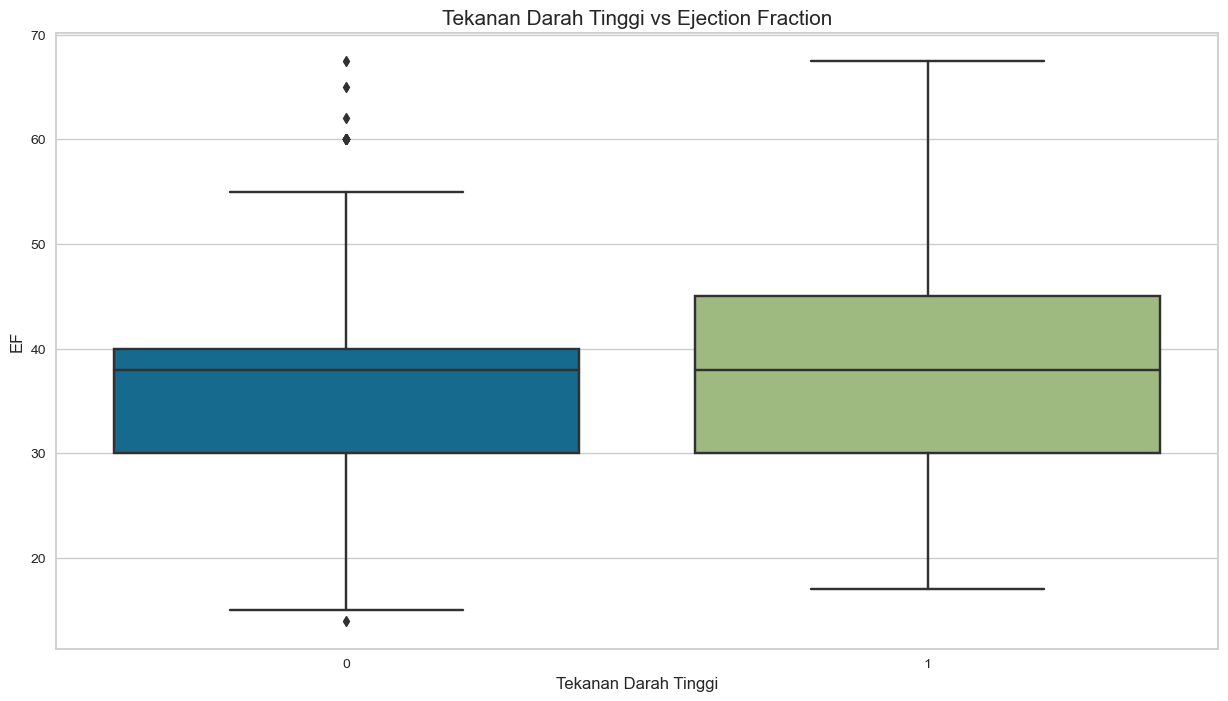

In [345]:
fig, ax = plt.subplots(figsize=(15, 8))

sns.boxplot(x='Hipertensi', y='EF', data=df)

plt.xlabel("Tekanan Darah Tinggi", fontsize= 12)
plt.ylabel("EF", fontsize= 12)
plt.title("Tekanan Darah Tinggi vs Ejection Fraction", fontsize= 15)

# Save Plot
plt.savefig("boxplot.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

**Kesimpulan :** Pada grafik Boxplot diatas terlihat bahwa 0 (tidak memiliki riwayat hipertensi) memiliki jangkauan yang cukup jauh dengan 1 (memiliki riwayat hipertensi) serta outlier 0 (tidak memiliki riwayat hipertensi) juga lebih banyak daripada 1 (memiliki riwayat hipertensi).

### Melakukan Visualisasi Korelasi Antar Variabel Untuk Melihat Hubungan

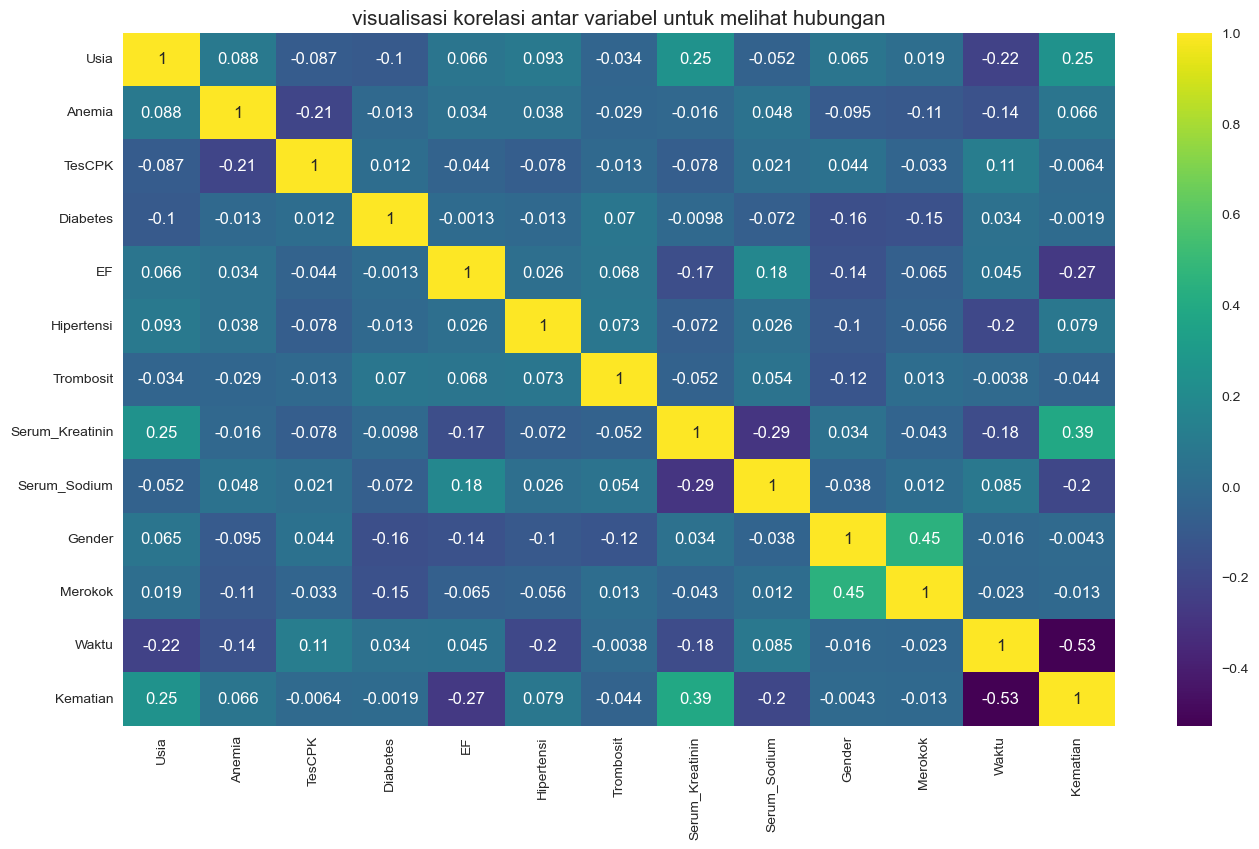

<Figure size 800x550 with 0 Axes>

In [346]:
plt.figure(figsize=(16, 9))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.title("visualisasi korelasi antar variabel untuk melihat hubungan", fontsize= 15)
plt.show()

# Save Plot
plt.savefig("corr.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

**Kesimpulan :** Berdasarkan visualisasi heatmap di atas, dapat disimpulkan bahwa

- Merokok dan Gender memiliki korelasi tinggi yaitu 0.45
- Waktu memiliki korelasi rendah dengan Kematian yaitu -0.53
- Serum_Kreatinin memiliki korelasi tinggi dengan Kematian dengan nilai 0.29
- Usia juga memiliki korelasi tinggi dengan Kematian dengan nilai 0.25

## 6. Data Preprocessing
***
Bagian ini berisi proses penyiapan data untuk proses pelatihan model,
seperti pembagian data menjadi train-dev-test, transformasi data
(normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

### Encode
Encoding fitur kategorik menggunakan replace function pada atribut bertipe Object.

In [347]:
# Extract kolom categorical 
cat_col = df.select_dtypes(object).columns.tolist()
len(cat_col)

2

In [348]:
# Mengonversi nilai yang dikategorikan menjadi nilai numerik
le = LabelEncoder()
df[cat_col] =df[cat_col].astype('str').apply(le.fit_transform)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Usia             299 non-null    float64
 1   Anemia           299 non-null    int64  
 2   TesCPK           299 non-null    float64
 3   Diabetes         299 non-null    int64  
 4   EF               299 non-null    float64
 5   Hipertensi       299 non-null    int64  
 6   Trombosit        299 non-null    float64
 7   Serum_Kreatinin  299 non-null    float64
 8   Serum_Sodium     299 non-null    int64  
 9   Gender           299 non-null    int64  
 10  Merokok          299 non-null    int64  
 11  Waktu            299 non-null    int64  
 12  Kematian         299 non-null    int64  
 13  JenisKelamin     299 non-null    int32  
 14  Death_Status     299 non-null    int32  
dtypes: float64(5), int32(2), int64(8)
memory usage: 32.8 KB


In [349]:
df

,Usia,Anemia,TesCPK,Diabetes,EF,Hipertensi,Trombosit,Serum_Kreatinin,Serum_Sodium,Gender,Merokok,Waktu,Kematian,JenisKelamin,Death_Status
0,75.0,0,582.00,0,20.0,1,265000.00,1.90,130,1,0,4,1,1,1
1,55.0,0,1280.25,0,38.0,0,263358.03,1.10,136,1,0,6,1,1,1
2,65.0,0,146.00,0,20.0,0,162000.00,1.30,129,1,1,7,1,1,1
3,50.0,1,111.00,0,20.0,0,210000.00,1.90,137,1,0,7,1,1,1
4,65.0,1,160.00,1,20.0,0,327000.00,2.15,125,0,0,8,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61.00,1,38.0,1,155000.00,1.10,143,1,1,270,0,1,0
295,55.0,0,1280.25,0,38.0,0,270000.00,1.20,139,0,0,271,0,0,0
296,45.0,0,1280.25,1,60.0,0,440000.00,0.80,138,0,0,278,0,0,0
297,45.0,0,1280.25,0,38.0,0,140000.00,1.40,140,1,1,280,0,1,0


In [350]:
X = df.drop(['Kematian'], axis=1)
y = df['Kematian']
print(X.shape)
print(y.shape)

(299, 14)
(299,)


### Feature Selection
Bagian ini berisi proses memilih fitur yang paling berpengaruh terhadap model.

In [351]:
etc = ExtraTreesClassifier()
etc.fit(X,y)

ExtraTreesClassifier()

Melakukan feature selection menggunakan library F regression dengan k=10

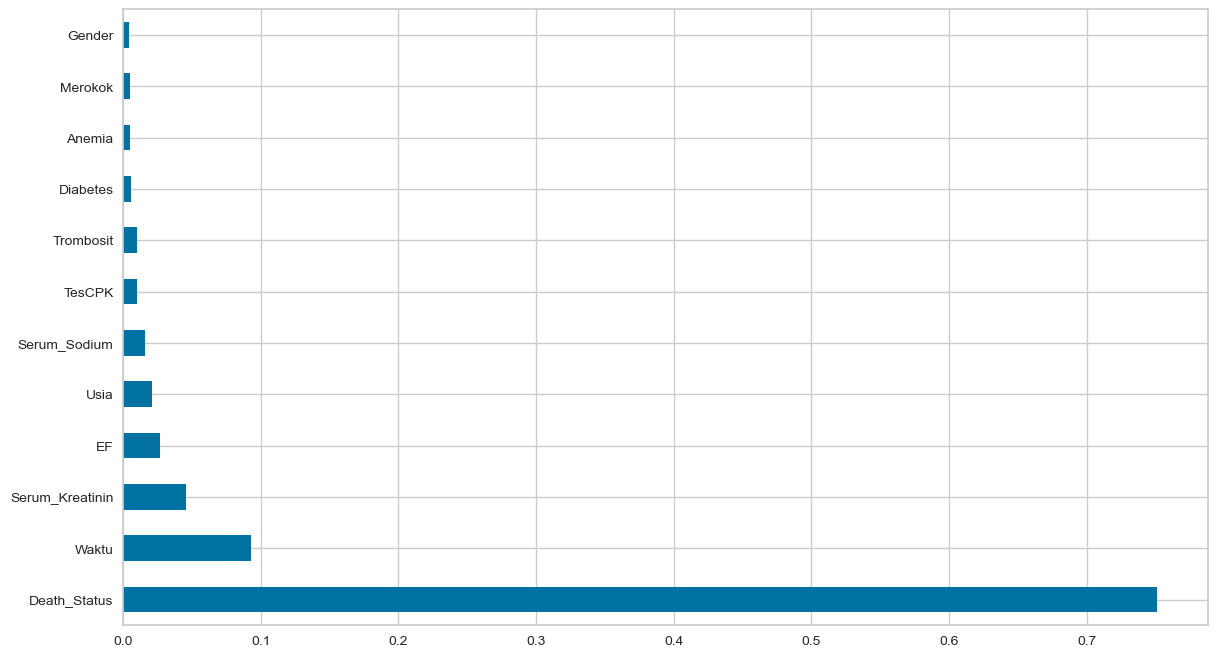

In [352]:
plt.figure(figsize=(14,8))
feat_importances= pd.Series(etc.feature_importances_,index=X.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

Setelah diperoleh feature yang paling berpengaruh pada model, dilakukan inisiasi final pada variabel X yang akan dijadikan training.

Dalam hal ini dipilih 5 atribut yang paling berpengaruh signifikan berdasarkan uji feature selection yang telah dilakukan, yaitu atribut Serum_Sodium, Usia, EF, Serum_Keratinin, dan Waktu.

In [353]:
X_fit = df[['Usia','EF','Serum_Sodium','Serum_Kreatinin','Waktu']]
X_fit.head()

,Usia,EF,Serum_Sodium,Serum_Kreatinin,Waktu
0,75.0,20.0,130,1.90,4
1,55.0,38.0,136,1.10,6
2,65.0,20.0,129,1.30,7
3,50.0,20.0,137,1.90,7
4,65.0,20.0,125,2.15,8


### Model Defining
Bagian ini berisi cell untuk mendefinisikan model sampai kompilasi model.

Membagi data menjadi Training dan Testing dengan proporsi 0.8 dan 0.2.

In [354]:
# Melakukan splitting data
X_train, X_test, y_train, y_test = train_test_split(X_fit, y, test_size=0.2,random_state=46)

## 7. Pendefinisian Model
***
Bagian ini berisi cell untuk mendefinisikan model sampai kompilasi model.
Akan lebih bagus jika didahului dengan penjelasan mengapa memilih
arsitektur atau jenis model tertentu, alasan memilih nilai hyperparameter,
dan hal lain yang berkaitan.

a. Model yang pertama kami menggunakan DecisionTree dengan metode ensamble Bagging Classifier

In [355]:
model1 = DecisionTreeClassifier()
bag_model = BaggingClassifier(base_estimator=model1, n_estimators=100, bootstrap=True)

b. Metode yang kedua kami menggunakan ensamble Random Forest Classifier

In [356]:
model2 = RandomForestClassifier(n_estimators=50,random_state=46)

c. Metode yang ketiga kami menggunakan ensamble Gradient Boosting Classifier

In [357]:
model3 = GradientBoostingClassifier(n_estimators=100, random_state=46)

## 8. Pelatihan Model
***
Cell pada bagian ini hanya berisi code untuk melatih model dan output yang
dihasilkan.

In [358]:
bag_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)

In [359]:
model2.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=46)

In [360]:
model3.fit(X_train, y_train)

GradientBoostingClassifier(random_state=46)

## 9. Evaluasi Model
***
Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan
bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus
dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan
model.

#### Bagging Classifier

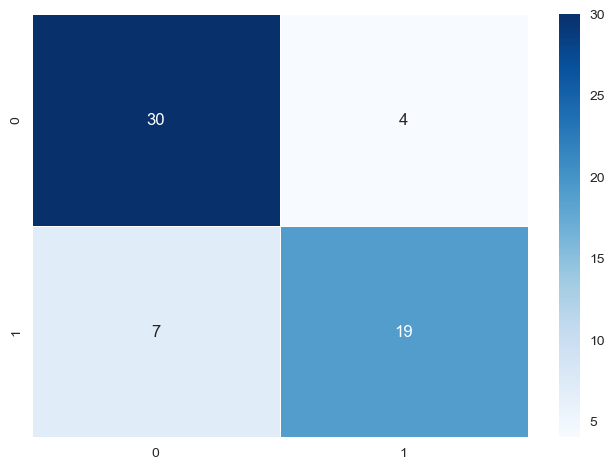

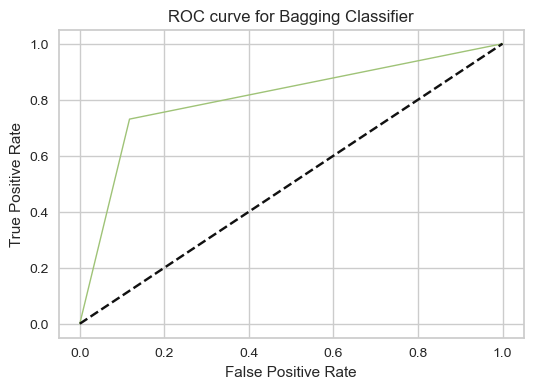

Training accuracy score:  1.0
Testing accuracy score:  0.8166666666666667
Cross-validation scores:[0.77083333 0.75       0.83333333 0.875      0.82978723]
Average cross-validation score: 0.811790780141844
              precision    recall  f1-score   support

           0       0.81      0.88      0.85        34
           1       0.83      0.73      0.78        26

    accuracy                           0.82        60
   macro avg       0.82      0.81      0.81        60
weighted avg       0.82      0.82      0.81        60



In [361]:
y_pred = bag_model.predict(X_test)

bagg = confusion_matrix(y_test, y_pred)
sns.heatmap(bagg, annot=True, fmt="d", linewidths=.5, cmap = 'Blues')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,'-g',linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for Bagging Classifier')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show();

print("Training accuracy score: ",bag_model.score(X_train, y_train))
print("Testing accuracy score: ",accuracy_score(y_pred, y_test))
scores = cross_val_score(bag_model, X_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {}'.format(scores.mean()))
print(classification_report(y_test, y_pred))

#### Random Forest Classifier

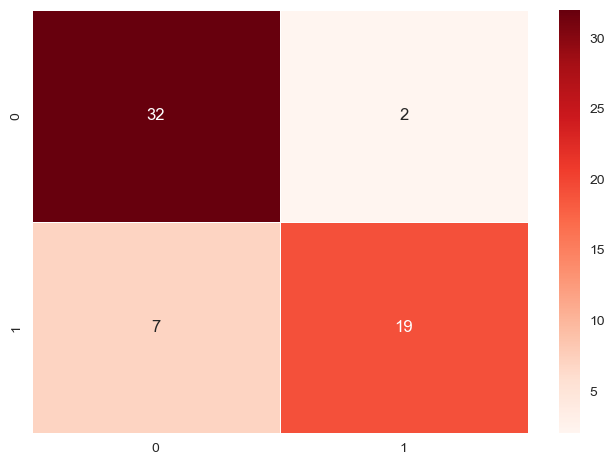

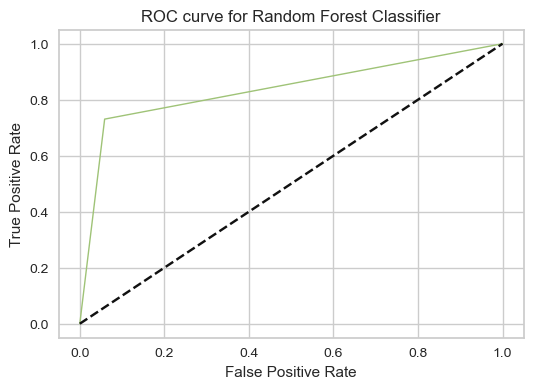

Training accuracy score:  1.0
Testing accuracy score:  0.85
Cross-validation scores:[0.8125     0.8125     0.89583333 0.89583333 0.78723404]
Average cross-validation score: 0.8407801418439718
              precision    recall  f1-score   support

           0       0.82      0.94      0.88        34
           1       0.90      0.73      0.81        26

    accuracy                           0.85        60
   macro avg       0.86      0.84      0.84        60
weighted avg       0.86      0.85      0.85        60



In [362]:
y_pred = model2.predict(X_test)

rf = confusion_matrix(y_test, y_pred)
sns.heatmap(rf, annot=True, fmt="d", linewidths=.5, cmap = 'Reds')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,'-g',linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for Random Forest Classifier')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show();

print("Training accuracy score: ",model2.score(X_train, y_train))
print("Testing accuracy score: ",accuracy_score(y_pred, y_test))
scores = cross_val_score(model2, X_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {}'.format(scores.mean()))
print(classification_report(y_test, y_pred))

#### Gradient Boosting Classifier

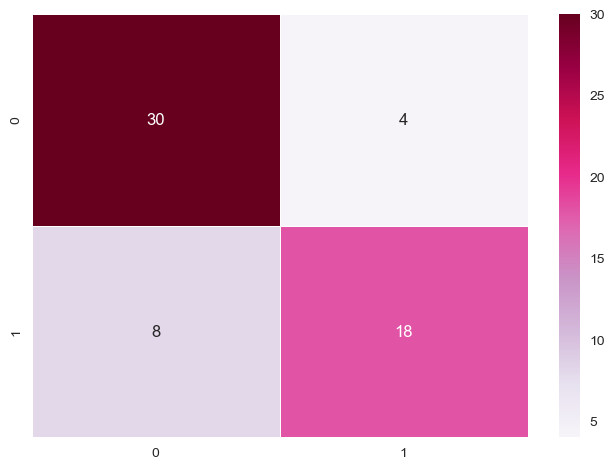

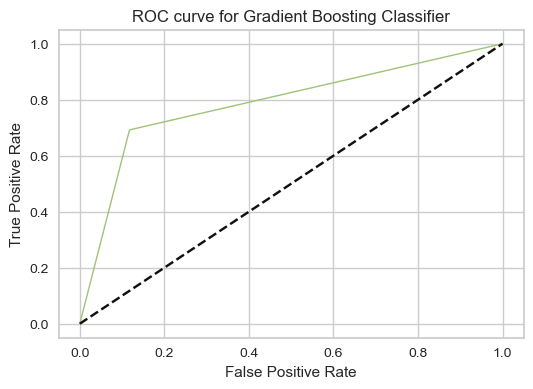

Training accuracy score:  0.9916317991631799
Testing accuracy score:  0.8
Cross-validation scores:[0.8125     0.83333333 0.875      0.85416667 0.82978723]
Average cross-validation score: 0.8409574468085106
              precision    recall  f1-score   support

           0       0.79      0.88      0.83        34
           1       0.82      0.69      0.75        26

    accuracy                           0.80        60
   macro avg       0.80      0.79      0.79        60
weighted avg       0.80      0.80      0.80        60



In [363]:
y_pred = model3.predict(X_test)

gb = confusion_matrix(y_test, y_pred)
sns.heatmap(gb, annot=True, fmt="d", linewidths=.5, cmap = 'PuRd')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,'-g',linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for Gradient Boosting Classifier')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show();

print("Training accuracy score: ",model3.score(X_train, y_train))
print("Testing accuracy score: ",accuracy_score(y_pred, y_test))
scores = cross_val_score(model3, X_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {}'.format(scores.mean()))
print(classification_report(y_test, y_pred))

**Kesimpulan** : 
Dari hasil 3 model yang telah digunakan, model ensemble Random Forest Classifier memiliki nilai evaluasi model terbaik dibandingkan Bagging Classifier dan Gradient Boosting Classifier. Oleh karena itu, model Random Forest Classifier merupakan model yang baik untuk melakukan prediksi kematian pasien gagal jantung.

## 10. Model Inference
***
Bagian ini diisi dengan model inference, di mana model yang sudah kita
latih akan dicoba pada data selain data yang sudah tersedia. Data yang
dimaksud bisa berupa data buatan oleh student, ataupun data yang ada
pada internet.

In [364]:
X_new = {'Usia':[81,42,50,65,74],'EF':[25,30,35,38,22],'Serum_Sodium':[133,138,120,140,116],
        'Serum_Kreatinin':[1.4,3.9,2,1.1,2.3],'Waktu':[1,2,3,4,5]}
X_new = pd.DataFrame(X_new)
X_new.head()

,Usia,EF,Serum_Sodium,Serum_Kreatinin,Waktu
0,81,25,133,1.4,1
1,42,30,138,3.9,2
2,50,35,120,2.0,3
3,65,38,140,1.1,4
4,74,22,116,2.3,5


In [365]:
list(X_new)

['Usia', 'EF', 'Serum_Sodium', 'Serum_Kreatinin', 'Waktu']

In [366]:
y_pred_new = model2.predict(X_new)
print('Prediksi Pasien yaitu: ')
print(y_pred_new)

Prediksi Pasien yaitu: 
[1 0 1 1 1]


## 11. Pengambilan Kesimpulan
***
Dari analisis yang telah kami lakukan, maka dapat diperoleh kesimpulan sebagai berikut:
- Terdapat 13 atribut yang diasumsikan memengaruhi kematian pasien gagal jantung. Setelah dilakukan analisis, kami mengambil 5 atribut/faktor yang paling berpengaruh dalam model.
- Pada datset ini tidak terdapat adanya misssing value pada setiap atributnya
- Pada analisis ini kami juga membuat beberapa visualisasi menggunakan boxplot, histogram, pie chart, dan matriks korelasi (heatmap) dan kami juga melakukan beberapa contoh groupby dan query terhadap data yang ada
- Faktor-faktor yang berpengaruh signifikan terhadap kematian pasien gagal jantung yaitu Usia, Fraksi Ejeksi, Serum Kreatinin, Serum Sodium, dan Waktu.
- Pada project ini kami menggunakan ensamble Bagging Classifier, Random Forest Classifier, dan Gradient Boosting Classifier
- Model ensemble Random Forest Classifier memiliki nilai evaluasi model terbaik dibandingkan Bagging Classifier dan Gradient Boosting Classifier. Oleh karena itu, model Random Forest Classifier merupakan model yang baik untuk melakukan prediksi kematian pasien gagal jantung.
- Model Bagging Classifier memiliki Akurasi **0.80**, Presisi sebesar **0.79**, Recall sebesar **0.73**, dan F1 Score sebesar **0.76**.
- Model Random Forest Classifier memiliki Akurasi **0.85**, Presisi sebesar **0.90**, Recall sebesar **0.73**, dan F1 Score sebesar **0.81**.
- Model Gradient Boosting Classifier memiliki Akurasi **0.80**, Presisi sebesar **0.82**, Recall sebesar **0.69**, dan F1 Score sebesar **0.75**.